Importing dependancies

In [0]:
import torch
from torch import optim
from torch import nn
import matplotlib.pyplot as plt


In [0]:
import pandas as pd
import numpy as np


In [0]:
from torchvision import datasets,transforms

In [6]:
torch.manual_seed(7)
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,05.))])
trainset=datasets.CIFAR10('cifar/',train=True,transform=transform,download=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [7]:
torch.manual_seed(7)
testset=datasets.CIFAR10('cifarTest/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [0]:

imageTest,labelTest=next(iter(testloader))


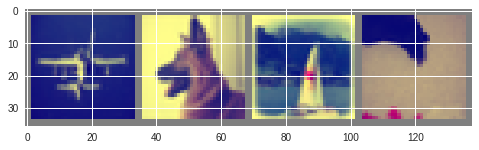

      plane         dog        ship         cat


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%11s' % classes[labels[j]] for j in range(4)))

In [11]:
for images,labels in trainloader:
  print(images.shape)
  break;

torch.Size([64, 3, 32, 32])


In [0]:
def model3_def(dropout_rate):
  model3=nn.Sequential(nn.Linear(32*32*3,256),
                   nn.ReLU(),
                   nn.Dropout(dropout_rate),    
                   nn.Linear(256,64), 
                   nn.ReLU(),
                   nn.Dropout(dropout_rate), 
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1)
                   )
  
  torch.save(model3.state_dict(), 'initial3.pth')
  return model3

def model2_def(dropout_rate):
  model2=nn.Sequential(nn.Linear(32*32*3,64),
                   nn.ReLU(),
                   nn.Dropout(dropout_rate), 
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1)
                    )
  torch.save(model2.state_dict(), 'initial2.pth')
  return model2


### learning rate: 0.004 

In [0]:
def train(lr,d):

  criterion=nn.NLLLoss()
  epochs=5
  model3=model3_def(d)
  model3.load_state_dict(torch.load('initial3.pth'))
  optimizer=optim.SGD(model3.parameters(),lr=lr,momentum=0.7)
  accuracy_test=[]
  errorTrain=[]
  errorTest=[]
  print ("Learning Rate:{} and Dropout Rate:{}".format(lr,d))
  torch.manual_seed(7)
  for e in range(epochs):

      running_loss=0;
      validation_loss=0;
      accuracy=0;
      for images,labels in trainloader:
          optimizer.zero_grad()
          logits=model3(images.view(images.shape[0],-1))
          loss=criterion(logits,labels)
          loss.backward()
          optimizer.step()
          running_loss+=loss

      with torch.no_grad():
        model3.eval()
        for imageTest,labelTest in testloader:
            logits_test=model3(imageTest.view(imageTest.shape[0],-1))
            lossTest=criterion(logits_test,labelTest)
            validation_loss+=lossTest
            ps=torch.exp(logits)
            top_p,top_class=ps.topk(1,dim=1)
            equals=top_class==labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
        model3.train()     

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(validation_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format((accuracy/len(testloader))*100))
        errorTest.append(validation_loss/len(testloader))
        errorTrain.append(running_loss/len(trainloader))
        accuracy_test.append((accuracy/len(testloader))*100)
  
          
  
  plt.plot(errorTrain,label='Training loss')

  plt.plot(errorTest,label='Validation loss')
  plt.legend()
  plt.title('No. of layers:3  learning rate={}  dropout={}'.format(lr,d))
  plt.xlabel('number of epochs')
  plt.ylabel('error')
  plt.savefig("model_3_"+str(lr)+"_"+str(d)+".png") 
  plt.show()
  plt.clf()




Learning Rate:0.01 and Dropout Rate:0.2
Epoch: 1/5..  Training Loss: 2.010..  Test Loss: 1.800..  Test Accuracy: 43.750
Epoch: 2/5..  Training Loss: 1.750..  Test Loss: 1.637..  Test Accuracy: 37.500
Epoch: 3/5..  Training Loss: 1.629..  Test Loss: 1.530..  Test Accuracy: 56.250
Epoch: 4/5..  Training Loss: 1.552..  Test Loss: 1.497..  Test Accuracy: 62.500
Epoch: 5/5..  Training Loss: 1.495..  Test Loss: 1.444..  Test Accuracy: 75.000


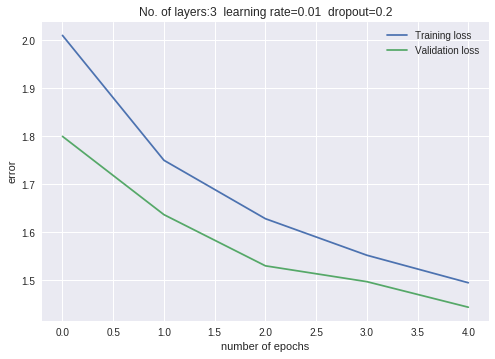

Learning Rate:0.01 and Dropout Rate:0.7
Epoch: 1/5..  Training Loss: 2.154..  Test Loss: 1.947..  Test Accuracy: 12.500
Epoch: 2/5..  Training Loss: 2.006..  Test Loss: 1.854..  Test Accuracy: 18.750
Epoch: 3/5..  Training Loss: 1.951..  Test Loss: 1.802..  Test Accuracy: 37.500
Epoch: 4/5..  Training Loss: 1.912..  Test Loss: 1.766..  Test Accuracy: 31.250
Epoch: 5/5..  Training Loss: 1.881..  Test Loss: 1.729..  Test Accuracy: 37.500


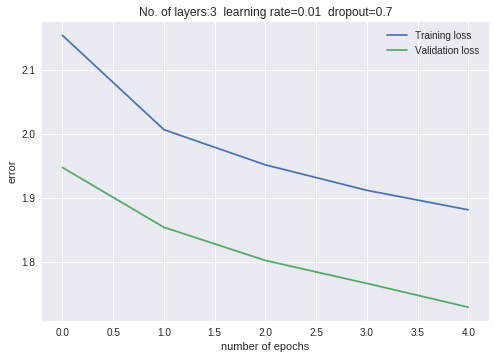

Learning Rate:0.1 and Dropout Rate:0.2
Epoch: 1/5..  Training Loss: 1.861..  Test Loss: 1.684..  Test Accuracy: 12.500
Epoch: 2/5..  Training Loss: 1.716..  Test Loss: 1.650..  Test Accuracy: 25.000
Epoch: 3/5..  Training Loss: 1.669..  Test Loss: 1.591..  Test Accuracy: 43.750
Epoch: 4/5..  Training Loss: 1.638..  Test Loss: 1.586..  Test Accuracy: 56.250
Epoch: 5/5..  Training Loss: 1.609..  Test Loss: 1.599..  Test Accuracy: 43.750


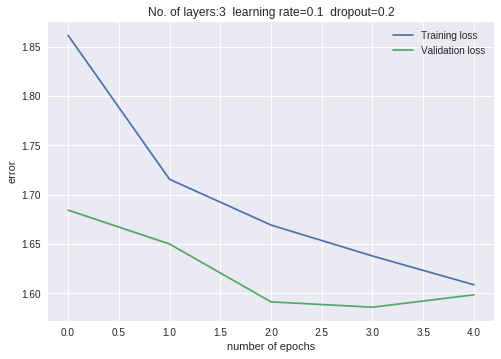

Learning Rate:0.1 and Dropout Rate:0.7
Epoch: 1/5..  Training Loss: 2.244..  Test Loss: 2.192..  Test Accuracy: 0.000
Epoch: 2/5..  Training Loss: 2.246..  Test Loss: 2.254..  Test Accuracy: 12.500
Epoch: 3/5..  Training Loss: 2.226..  Test Loss: 2.209..  Test Accuracy: 6.250
Epoch: 4/5..  Training Loss: 2.213..  Test Loss: 2.202..  Test Accuracy: 25.000
Epoch: 5/5..  Training Loss: 2.207..  Test Loss: 2.212..  Test Accuracy: 18.750


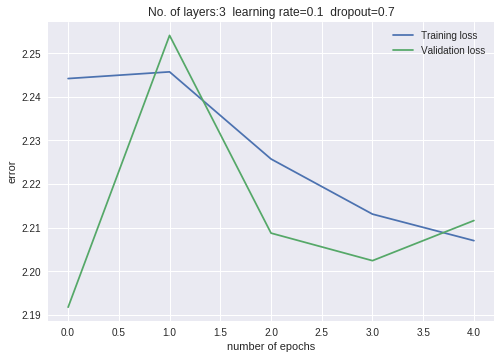

In [34]:
for a in [0.01,0.1]:
  for b in [0.2,0.7]:
    train(a,b)

In [0]:


def train2(lr,d):

  criterion=nn.NLLLoss()
  epochs=5
  model2=model2_def(d)
  model2.load_state_dict(torch.load('initial2.pth'))
  optimizer=optim.SGD(model2.parameters(),lr=lr,momentum=0.7)
  
  accuracy_test=[]
  errorTrain=[]
  errorTest=[]
  print ("Learning Rate:{} and Dropout Rate:{}".format(lr,d))
  torch.manual_seed(7)
  for e in range(epochs):

      running_loss=0;
      validation_loss=0;
      accuracy=0;
      for images,labels in trainloader:
          optimizer.zero_grad()
          logits=model2(images.view(images.shape[0],-1))
          loss=criterion(logits,labels)
          loss.backward()
          optimizer.step()
          running_loss+=loss

      with torch.no_grad():
        model2.eval()
        for imageTest,labelTest in testloader:
            logits_test=model2(imageTest.view(imageTest.shape[0],-1))
            lossTest=criterion(logits_test,labelTest)
            validation_loss+=lossTest
            ps=torch.exp(logits)
            top_p,top_class=ps.topk(1,dim=1)
            equals=top_class==labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))

        model2.train()
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(validation_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format((accuracy/len(testloader))*100))
        errorTest.append(validation_loss/len(testloader))
        errorTrain.append(running_loss/len(trainloader))
        accuracy_test.append((accuracy/len(testloader))*100)
          
          

  plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
  plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
  plt.legend()
  plt.title('No. of layers=2 learning rate={} Momentum={}'.format(lr,d))
  plt.xlabel('number of epochs')
  plt.ylabel('error')
  plt.savefig("model__"+str(lr)+"_"+str(d)+".png") 
  plt.show()
  plt.clf()





Learning Rate:0.01 and Dropout Rate:0.2
Epoch: 1/5..  Training Loss: 1.931..  Test Loss: 1.765..  Test Accuracy: 31.250
Epoch: 2/5..  Training Loss: 1.742..  Test Loss: 1.639..  Test Accuracy: 37.500
Epoch: 3/5..  Training Loss: 1.650..  Test Loss: 1.574..  Test Accuracy: 25.000
Epoch: 4/5..  Training Loss: 1.598..  Test Loss: 1.545..  Test Accuracy: 43.750
Epoch: 5/5..  Training Loss: 1.565..  Test Loss: 1.525..  Test Accuracy: 18.750


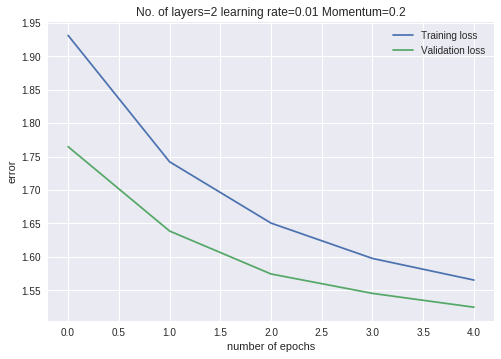

Learning Rate:0.01 and Dropout Rate:0.7
Epoch: 1/5..  Training Loss: 2.050..  Test Loss: 1.873..  Test Accuracy: 25.000
Epoch: 2/5..  Training Loss: 1.942..  Test Loss: 1.796..  Test Accuracy: 18.750
Epoch: 3/5..  Training Loss: 1.894..  Test Loss: 1.754..  Test Accuracy: 25.000
Epoch: 4/5..  Training Loss: 1.875..  Test Loss: 1.728..  Test Accuracy: 6.250
Epoch: 5/5..  Training Loss: 1.856..  Test Loss: 1.712..  Test Accuracy: 31.250


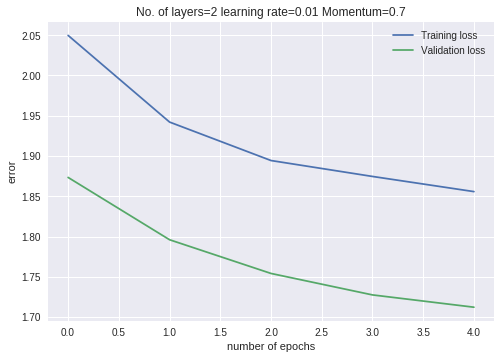

Learning Rate:0.1 and Dropout Rate:0.2
Epoch: 1/5..  Training Loss: 1.899..  Test Loss: 1.797..  Test Accuracy: 6.250
Epoch: 2/5..  Training Loss: 1.789..  Test Loss: 1.649..  Test Accuracy: 50.000
Epoch: 3/5..  Training Loss: 1.737..  Test Loss: 1.696..  Test Accuracy: 31.250
Epoch: 4/5..  Training Loss: 1.712..  Test Loss: 1.653..  Test Accuracy: 37.500
Epoch: 5/5..  Training Loss: 1.679..  Test Loss: 1.680..  Test Accuracy: 18.750


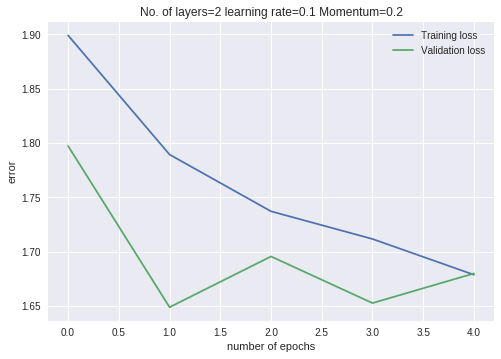

Learning Rate:0.1 and Dropout Rate:0.7
Epoch: 1/5..  Training Loss: 2.275..  Test Loss: 1.994..  Test Accuracy: 12.500
Epoch: 2/5..  Training Loss: 2.211..  Test Loss: 1.943..  Test Accuracy: 12.500
Epoch: 3/5..  Training Loss: 2.181..  Test Loss: 1.952..  Test Accuracy: 12.500
Epoch: 4/5..  Training Loss: 2.169..  Test Loss: 1.931..  Test Accuracy: 12.500
Epoch: 5/5..  Training Loss: 2.153..  Test Loss: 1.908..  Test Accuracy: 18.750


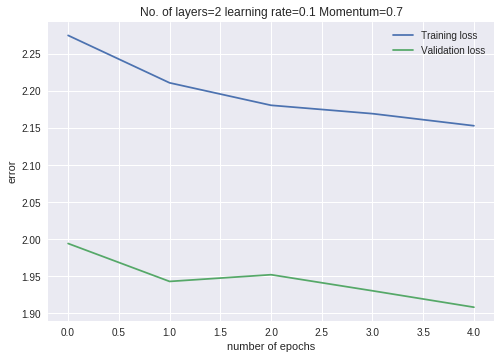

In [42]:
for a in [0.01,0.1]:
  for b in [0.2,0.7]:
    train2(a,b)